In [1]:
import os
import pandas as pd

# Path to your images folder
base_path = "images"

data = []
for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)
    if os.path.isdir(folder_path):
        for img_file in os.listdir(folder_path):
            if img_file.lower().endswith((".jpg", ".jpeg", ".png")):
                data.append({
                    "filepath": os.path.join(folder_path, img_file),
                    "label": folder
                })

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("image_data.csv", index=False)
print("Saved to image_data.csv with", len(df), "records.")


Saved to image_data.csv with 4929 records.


In [2]:
df_sampled = df.sample(n=500, random_state=42)


In [ ]:
df_sampled = df.groupby("label").sample(n=40, random_state=42)


In [4]:
print(len(df_sampled))


1000


In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
from PIL import Image, ImageEnhance
import numpy as np
import cv2  # make sure opencv-python is installed
import matplotlib.pyplot as plt

# Parameters
IMAGE_SIZE = (224, 224)  # Standard size for CNNs


In [7]:
def preprocess_image(image_path):
    # Open the image
    img = Image.open(image_path).convert("RGB")
    
    # Resize
    img = img.resize(IMAGE_SIZE)
    
    # Optional: Enhance brightness/contrast for better OCR
    enhancer = ImageEnhance.Contrast(img)
    img = enhancer.enhance(1.5)  # You can tune this
    
    # Convert to numpy array
    img_array = np.array(img) / 255.0  # Normalize to [0,1]
    
    return img_array


In [8]:
# Use the df you created earlier (image_labels.csv or your dataframe from Step 1)
image_data = []
labels = []

for i, row in df_sampled.iterrows():
    try:
        img_array = preprocess_image(row['filepath'])
        image_data.append(img_array)
        labels.append(row['label'])
    except Exception as e:
        print(f"Error loading {row['filepath']}: {e}")


In [9]:
X = np.array(image_data)
y = np.array(labels)
print("Shape of X:", X.shape)
print("Number of labels:", len(y))


Shape of X: (1000, 224, 224, 3)
Number of labels: 1000


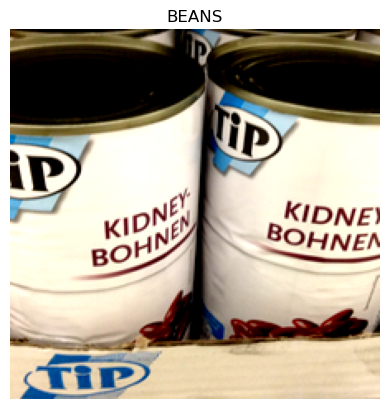

In [10]:
plt.imshow(X[0])
plt.title(y[0])
plt.axis('off')
plt.show()


In [11]:
from paddleocr import PaddleOCR

# Initialize once (CPU mode is default and works well)
ocr = PaddleOCR(use_angle_cls=True, lang='en')


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8536\789291257.py:4: DeprecationWarning: The parameter `use_angle_cls` has been deprecated and will be removed in the future. Please use `use_textline_orientation` instead.
  ocr = PaddleOCR(use_angle_cls=True, lang='en')
c:\Users\ASUS\anaconda3\Lib\site-packages\paddle\utils\cpp_extension\extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in C:\Users\ASUS\.paddlex\official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('UVDoc', None)
Using official model (UVDoc), the model files will be automatically downloaded and saved in C:\Users\ASUS\.paddlex\official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Using official model (PP-LCNet_x1_0_textline_ori), the model files will be automatically downloaded and saved in C:\Users\ASUS\.paddlex\official_models.
Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in C:\Users\ASUS\.paddlex\official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-OCRv5_server_rec', None)
Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in C:\Users\ASUS\.paddlex\official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

In [21]:
from paddleocr import PaddleOCR

ocr = PaddleOCR(use_angle_cls=True, lang='en')  # Only once

def extract_text_paddleocr(image_path):
    try:
        # Use predict() with image path as *positional* argument (no keyword!)
        result = ocr.predict(image_path)
        
        # Extract text (v3 format: list[list[tuple]])
        extracted_text = " ".join([line[0] for block in result for line in block])
        return extracted_text
    except Exception as e:
        print(f"Failed on: {image_path} | Error: {e}")
        return ""


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8536\2518886856.py:3: DeprecationWarning: The parameter `use_angle_cls` has been deprecated and will be removed in the future. Please use `use_textline_orientation` instead.
  ocr = PaddleOCR(use_angle_cls=True, lang='en')  # Only once
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in C:\Users\ASUS\.paddlex\official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('UVDoc', None)
Using official model (UVDoc), the model files will be automatically downloaded and saved in C:\Users\ASUS\.paddlex\official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Using official model (PP-LCNet_x1_0_textline_ori), the model files will be automatically downloaded and saved in C:\Users\ASUS\.paddlex\official_models.
Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in C:\Users\ASUS\.paddlex\official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-OCRv5_server_rec', None)
Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in C:\Users\ASUS\.paddlex\official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

In [20]:
import paddleocr
print(paddleocr.__version__)


3.0.2


In [23]:
from tqdm import tqdm
tqdm.pandas()

df_sampled['ocr_text'] = df_sampled['filepath'].progress_apply(extract_text_paddleocr)


100%|██████████| 1000/1000 [8:09:10<00:00, 29.35s/it]     


In [24]:
df_sampled.to_csv("sampled_ocr_extracted.csv", index=False)


In [1]:
import pandas as pd

df = pd.read_csv("sampled_ocr_extracted.csv")


In [2]:
import re

def extract_expiry_date(text):
    if pd.isna(text):
        return None

    # Convert to lowercase for uniformity
    text = text.lower()
    
    # Look for lines with keywords like 'exp', 'expiry', 'best before'
    expiry_keywords = ['exp', 'expiry', 'exp.', 'best before', 'use by']
    
    # Combine all regex patterns for dates
    date_patterns = [
        r'\d{2}[/-]\d{2}[/-]\d{4}',      # 12/08/2025 or 12-08-2025
        r'\d{4}[/-]\d{2}[/-]\d{2}',      # 2025/08/12
        r'\d{2}[/-]\d{2}[/-]\d{2}',      # 12/08/25
        r'[a-zA-Z]{3,9} \d{4}',          # August 2025
        r'\d{4}',                        # Year only (as fallback)
    ]
    
    for keyword in expiry_keywords:
        if keyword in text:
            for pattern in date_patterns:
                match = re.search(pattern, text)
                if match:
                    return match.group()
    
    return None


In [3]:
df['expiry_date'] = df['ocr_text'].apply(extract_expiry_date)


In [ ]:
df.to_csv("final_expiry_extracted.csv", index=False)
# we have done the date extractor partfrom the extract text using ocr
